# 画辣椒标记方框
文件位于VOC2007同级目录

In [1]:
#文件导入
import numpy as np 
import cv2 
import os 
import matplotlib.pyplot as plt 
import time 
import os.path as osp 
import xml.etree.ElementTree as ET 
from matplotlib.colors import LogNorm 

In [36]:
if False: # 调试
   # 读取图片
   num_IMG = 1

   fore_name =['OriRGB_pitaya_', 'RbRGB_pitaya_']
   image_name = fore_name[0]+ str(num_IMG).zfill(6)


   rootpath1 ='./VOC2007/JPEGImages/'
   image = cv2.imread( os.path.join(rootpath1, image_name +'.jpg'))        
   # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     
   # plt.rcParams[ 'figure.figsize' ] = [16, 6]                           
   # plt.imshow(image) 

   # 去除背景的图像
   rootpath_Rb = 'JPEGImages_Rb_HLGMulti/'
   image_name_Rb = fore_name[1]+ str(num_IMG).zfill(6)
   # print('image_name_Rb',image_name_Rb)
   # print('path',os.path.join(rootpath1, image_name_Rb +'.jpg'))
   image_Rb = cv2.imread( os.path.join(rootpath_Rb, image_name_Rb +'.jpg')) 
   # image2 = cv2.cvtColor(image_Rb, cv2.COLOR_BGR2RGB) 
   # plt.rcParams[ 'figure.figsize' ] = [16, 6]                           
   # plt.imshow(image2) 

   # 读取 xml 
   # 读取路径下的文件  
   rootpath2 = './VOC2007/Annotations/'
   xml_filepath = os.path.join(rootpath2, image_name +'.xml')       
   print(xml_filepath) 

   updateTree = ET.parse(xml_filepath)  # parse xml documents into element tree
   root = updateTree.getroot()      # return root element


   # dict - bbox - cls 
   rectangle_loc={ }
   class_name = ["NO", "OWF", "OF", "FCC", "OB"]
   for cls in class_name:
      rectangle_loc[cls] = []


   for obj in root.iter('object'):
      cls = obj.find('name').text

      if cls == 'NO':
         xmlbox = obj.find('bndbox') 
         b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
         rectangle_loc['NO'].append(b)    

      elif cls == 'OWF':
         xmlbox = obj.find('bndbox') 
         b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
         rectangle_loc['OWF'].append(b) 

      elif cls == 'OF':
         xmlbox = obj.find('bndbox') 
         b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
         rectangle_loc['OF'].append(b)

      elif cls == 'FCC':
         xmlbox = obj.find('bndbox') 
         b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
         rectangle_loc['FCC'].append(b) 

      elif cls == 'OB':
         xmlbox = obj.find('bndbox') 
         b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
         rectangle_loc['OB'].append(b) 
      
      else:
         print( 'no target' ) 

   print(rectangle_loc)

In [37]:
if False: # 调试
    # opencv读取图片的默认像素排列是BGR = RGB
    # color_dict
    class_name = ["NO", "OWF", "OF", "FCC", "OB"]
    color_custom = [(255,0,0), (0,128,0), (0,0,255), (255,165,0), (128,0,128)]           # red = (255,0,0) | green=(0,128,0) | blue = (0,0,255) | Orange = (255,165,0) | Purple= (128,0,128)
    color_cls_dict ={ }

    for cls, col in zip(class_name, color_custom):
        # RGB ==> BGR
        col_BGR = [] # 清空
        col_RGB = list(col)
        col_BGR = [col_RGB[2], col_RGB[1] , col_RGB[0]]
        color_cls_dict[cls] = col_BGR
    print(color_cls_dict)


    # 绘制方框
    for key_cls, value_rectangle in rectangle_loc.items():
        print(key_cls, value_rectangle) 
    
        for i_num in range(len(value_rectangle)):
            xmin, ymin, xmax, ymax = value_rectangle[i_num]
            print('xmin, ymin, xmax, ymax == ', xmin, ymin, xmax, ymax )

            IMG_rec = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color_cls_dict[key_cls], 3)      # 画框,没有数据，
            IMG_rec_Rb = cv2.rectangle(image_Rb, (xmin, ymin), (xmax, ymax), color_cls_dict[key_cls], 3)
            
            
    floder_list = ['rectangle_box','rectangle_box_Rb']
    for floder in floder_list:
        if not os.path.isdir(floder):
            os.makedirs(floder)

    cv2.imwrite(floder_list[0] + '/'+ image_name + '_rectanglebox_img.jpg', IMG_rec)  
    cv2.imwrite(floder_list[1] + '/' + image_name_Rb + '_rectanglebox_img.jpg', IMG_rec_Rb)  
    


In [38]:
## == 批量处理 ==##
# 读取图片
def Get_rectangle_loc(num_IMG = 1,):
    
    # 读取图片
    # 文件名
    fore_name =['OriRGB_pitaya_', ]
    image_name = fore_name[0]+ str(num_IMG).zfill(6) 
    
    path_select = 0 
    if path_select==0:
        rootpath1 =  '..\datasets\VOC_HLGMulti_3clsDX2_DX8\images\\val2007\\'
    elif path_select==1:
        rootpath1 = '..\D3_mmdetection_master_HLGMulti\Detection_OutputResult\YOLOv3\VOC2007\JPEGImages\\'
    image = cv2.imread( os.path.join(rootpath1, image_name +'.jpg'))        
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     
    # plt.rcParams[ 'figure.figsize' ] = [16, 6]                           
    # plt.imshow(image)    

    # 读取 xml 
    # 读取路径下的文件  
    rootpath2 =  '..\datasets\VOC_HLGMulti_3clsDX2_DX8\images\VOCdevkit\VOC2007\Annotations\\'
    xml_filepath = os.path.join(rootpath2, image_name +'.xml')       
    print(xml_filepath) 

    updateTree = ET.parse(xml_filepath)  # parse xml documents into element tree
    root = updateTree.getroot()          # return root element

    # dict - bbox - cls 
    rectangle_loc={ }
    class_name = ["NO", "OWF", "OF", "FCC", "OB"]
    
    for cls in class_name:
        rectangle_loc[cls] = []


    for obj in root.iter('object'):
        cls = obj.find('name').text

        if cls == 'NO':
            xmlbox = obj.find('bndbox') 
            b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
            rectangle_loc['NO'].append(b)    

        elif cls == 'OWF':
            xmlbox = obj.find('bndbox') 
            b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
            rectangle_loc['OWF'].append(b) 

        elif cls == 'OF':
            xmlbox = obj.find('bndbox') 
            b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
            rectangle_loc['OF'].append(b)

        elif cls == 'FCC':
            xmlbox = obj.find('bndbox') 
            b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
            rectangle_loc['FCC'].append(b) 

        elif cls == 'OB':
            xmlbox = obj.find('bndbox') 
            b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
            rectangle_loc['OB'].append(b) 
        
        else:
            print( 'no target' ) 
        
    print(rectangle_loc, image_name) 

    return rectangle_loc, image, image_name 

Get_rectangle_loc(num_IMG = 476)

..\datasets\VOC_HLGMulti_3clsDX2_DX8\images\VOCdevkit\VOC2007\Annotations\OriRGB_pitaya_000476.xml
{'NO': [(212, 625, 306, 707), (348, 1033, 452, 1151)], 'OWF': [], 'OF': [], 'FCC': [], 'OB': [(141, 613, 208, 706), (131, 727, 160, 777), (506, 810, 610, 912)]} OriRGB_pitaya_000476


({'NO': [(212, 625, 306, 707), (348, 1033, 452, 1151)],
  'OWF': [],
  'OF': [],
  'FCC': [],
  'OB': [(141, 613, 208, 706), (131, 727, 160, 777), (506, 810, 610, 912)]},
 array([[[232, 197, 194],
         [227, 192, 189],
         [221, 187, 187],
         ...,
         [254, 255, 253],
         [252, 255, 253],
         [252, 255, 253]],
 
        [[235, 200, 197],
         [231, 196, 193],
         [228, 192, 192],
         ...,
         [254, 255, 253],
         [252, 255, 253],
         [252, 255, 253]],
 
        [[239, 202, 198],
         [235, 200, 196],
         [232, 197, 194],
         ...,
         [254, 255, 253],
         [254, 255, 251],
         [254, 255, 251]],
 
        ...,
 
        [[116, 114, 143],
         [116, 114, 143],
         [123, 116, 149],
         ...,
         [175, 171, 200],
         [176, 172, 201],
         [175, 171, 200]],
 
        [[109, 107, 137],
         [110, 107, 139],
         [119, 111, 148],
         ...,
         [182, 179, 204],
    

In [39]:
def plot_rectanglebox(rectangle_loc, image, image_name):
    # opencv读取图片的默认像素排列是BGR = RGB
    # color_dict
    # class_name = ["NO", "OWF", "OF", "FCC", "OB"] 
    # color_custom = [(255,0,0), (0,128,0), (0,0,255), (255,165,0), (128,0,128)]  # red = (255,0,0) | green=(0,128,0) | blue = (0,0,255) | Orange = (255,165,0) | Purple= (128,0,128)

    class_name = ["NO", "FCC", "OB"] 
    color_custom = [(255,0,0), (255,165,0), (0,128,0)]  # red = (255,0,0) | green=(0,128,0) | blue = (0,0,255) | Orange = (255,165,0) | Purple= (128,0,128)

    color_cls_dict ={ } 

    for cls, col in zip(class_name, color_custom):
        # RGB ==> BGR
        col_BGR = [] # 清空
        col_RGB = list(col)
        col_BGR = [col_RGB[2], col_RGB[1] , col_RGB[0]]
        color_cls_dict[cls] = col_BGR
    # print(color_cls_dict)


    # 绘制方框
    for key_cls, value_rectangle in rectangle_loc.items():
        print(key_cls, value_rectangle) 
    
        for i_num in range(len(value_rectangle)):
            xmin, ymin, xmax, ymax = value_rectangle[i_num]
            print('xmin, ymin, xmax, ymax == ', xmin, ymin, xmax, ymax )

            IMG_rec = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color_cls_dict[key_cls], 7)      # 画框,没有数据，
            
            
    # IMG_rec_Rb1 = cv2.cvtColor(IMG_rec_Rb, cv2.COLOR_BGR2RGB) 
    # plt.imshow(IMG_rec_Rb1)  
    # 生成文件夹     
    floder_list = ['OriIMGPlotRecT/rectangle_box','OriIMGPlotRecT/results_rectangle/'+ image_name.split('.')[0][-6:]]
    for floder in floder_list:
        if not os.path.isdir(floder):
            os.makedirs(floder)


    print(floder_list[1] + '/' + image_name+ '_rectanglebox_img.jpg')
    cv2.imwrite(floder_list[0] + '/'+ image_name + '_rectanglebox_img.jpg', IMG_rec, [cv2.IMWRITE_JPEG_QUALITY,50])  

    #存到对应文件夹
    # cv2.imwrite(floder_list[1] + '/'+ image_name + '_rectanglebox_img.jpg', IMG_rec)  
    
        

In [40]:
num_IMG_find=[476]

for num_IMG in num_IMG_find:
    rectangle_loc, image, image_name = Get_rectangle_loc(num_IMG = num_IMG) 
    
    plot_rectanglebox(rectangle_loc, image = image, image_name= image_name) 
    rectangle_loc, image, image_name = None, None, None #清空 


..\datasets\VOC_HLGMulti_3clsDX2_DX8\images\VOCdevkit\VOC2007\Annotations\OriRGB_pitaya_000476.xml
{'NO': [(212, 625, 306, 707), (348, 1033, 452, 1151)], 'OWF': [], 'OF': [], 'FCC': [], 'OB': [(141, 613, 208, 706), (131, 727, 160, 777), (506, 810, 610, 912)]} OriRGB_pitaya_000476
NO [(212, 625, 306, 707), (348, 1033, 452, 1151)]
xmin, ymin, xmax, ymax ==  212 625 306 707
xmin, ymin, xmax, ymax ==  348 1033 452 1151
OWF []
OF []
FCC []
OB [(141, 613, 208, 706), (131, 727, 160, 777), (506, 810, 610, 912)]
xmin, ymin, xmax, ymax ==  141 613 208 706
xmin, ymin, xmax, ymax ==  131 727 160 777
xmin, ymin, xmax, ymax ==  506 810 610 912
OriIMGPlotRecT/results_rectangle/000476/OriRGB_pitaya_000476_rectanglebox_img.jpg


In [41]:
os.getcwd()

'f:\\F_VScode_HLGDetection\\A_code_run_multi_class\\yolov5-masterv6_HLGMulti_CA3_X1_Y3 - 3-All'

In [42]:
# # 输出所有的手工画框图片
# # 读取txt 文件
# testimg_txtpath = '..\datasets\VOC_HLGMulti_3clsDX2_DX8\images\VOCdevkit\VOC2007\ImageSets\Main\\val.txt'
# with open(testimg_txtpath) as f:
#     test_lines = f.readlines()
# print(test_lines[0]) 


# num_IMG_find_all =[]
# for i_num in range(len(test_lines)):
#     num_IMG_find_all.append(int(test_lines[i_num][-5:-1]))
# print(num_IMG_find_all)

# for num_IMG in num_IMG_find_all:
#     rectangle_loc, image, image_name = Get_rectangle_loc(num_IMG = num_IMG) 
    
#     plot_rectanglebox(rectangle_loc, image = image, image_name= image_name) 
#     rectangle_loc, image, image_name = None, None, None #清空

OriRGB_pitaya_000476

[476, 469, 974, 1316, 628, 866, 649, 457, 793, 241, 733, 982, 691, 1295, 697, 581, 1265, 1232, 682, 314, 1100, 1280, 718, 587, 223, 1246, 124, 1112, 897, 1078, 592, 516, 200, 26, 1340, 254, 616, 1201, 929, 1237, 870, 850, 848, 477, 975, 1002, 1161, 543, 1057, 610, 71, 1315, 602, 1040, 414, 915, 567, 1176, 1215, 1073, 432, 270, 570, 611, 707, 478, 411, 1360, 280, 80, 1035, 22, 1047, 21, 1032, 1097, 638, 1121, 328, 317, 911, 955, 696, 64, 153, 1203, 1000, 56, 441, 87, 506, 1089, 417, 713, 267, 146, 690, 1289, 976, 669, 130, 325, 565, 1188, 1269, 175, 1306, 729, 1076, 498, 231, 961, 1308, 167, 883, 1336, 244, 1003, 966, 466, 177, 25, 1182, 643, 844, 627, 385, 785, 782, 471, 1051, 1261, 1227, 1356, 1250, 470, 761, 459, 455, 439, 1260, 144, 653, 16, 150, 45, 563, 830, 607, 370, 884, 934, 1191, 1230, 172, 880, 890, 1277, 750, 279, 1151, 142, 207, 264, 723, 754, 1068, 631, 424, 131, 625, 833, 392, 1096, 110, 1359, 1278, 1319, 596, 657, 211, 1279, 197, 1212, 452, 906, 421

In [43]:
if False:
   # 深度图像 
   num_IMG_find=[39, 140, 176, 252, 265, 344, 345, 362, 363, 443, 494, 571, 808, 927, 1058, 1217]
   rootpath_depthimage = 'DepthImages_npy_Sort/'
   savepath_depthimage = 'DepthImages_img/' 

   for num_IMG in num_IMG_find:
      deep_image_npy = np.load(file = rootpath_depthimage +'depth_pitaya_'+ str(num_IMG).zfill(6) +'.npy')    # 加载npy文件
      deep_image_npy_cMAP = cv2.applyColorMap(cv2.convertScaleAbs(deep_image_npy, alpha=0.03), cv2.COLORMAP_JET) #伪彩图

      floder_list = [ savepath_depthimage,'results_rectangle/'+ str(num_IMG).zfill(6) ]
      for floder in floder_list:
         if not os.path.isdir(floder):
            os.makedirs(floder)

      cv2.imwrite( savepath_depthimage + 'depth_pitaya_' + str(num_IMG).zfill(6)+'.jpg', deep_image_npy_cMAP) # 保存图像数据
      # 存到对应文件夹
      cv2.imwrite(floder_list[1] + '/'+ 'depth_pitaya_' + str(num_IMG).zfill(6)+'.jpg', deep_image_npy_cMAP)  
   

In [2]:
#文件导入
import numpy as np 
import cv2 
import os 
import matplotlib.pyplot as plt 
import time 
import os.path as osp 
import xml.etree.ElementTree as ET 
from matplotlib.colors import LogNorm 

In [3]:
# 对比图
# 读图片
ori_rect_path = 'OriIMGPlotRecT\\rectangle_box'
dect_YOLOv3_rect_path = '..\D3_mmdetection_master_HLGMulti\Detection_OutputResult\YOLOv3\VOC2007\JPEGImages'
dect_YOLOWGB_rect_path = 'runs\detect\ALL_IMG\yolov3_A3_CSP_SPPG_Bi_trian24_T(11)_9'

testimg_txtpath = '..\datasets\VOC_HLGMulti_3clsDX2_DX8\images\VOCdevkit\VOC2007\ImageSets\Main\\val.txt'
with open(testimg_txtpath) as f:
    test_lines = f.readlines()
print(test_lines[0]) 

for i_num in range(len(test_lines)):

    image_name_P = test_lines[i_num][:-1]
    print(image_name_P) 
    ori_rect_image = cv2.imread( os.path.join(ori_rect_path, image_name_P +'_rectanglebox_img'+'.jpg')) #OriRGB_pitaya_001111_rectanglebox_img
    # print(ori_rect_image) 
    dect_YOLOv3_rect_image =  cv2.imread( os.path.join(dect_YOLOv3_rect_path, image_name_P +'.jpg'))
    # print(dect_YOLOv3_rect_image.shape)
    dect_YOLOWGB_rect_image =  cv2.imread( os.path.join(dect_YOLOWGB_rect_path, image_name_P+ '_yolov3_A3_CSP_SPPG_Bi_trian24_T(11)_9' +'.jpg'))
    # print(dect_YOLOWGB_rect_image)
    # 图片拼接
    img_array_AB = np.hstack((ori_rect_image, dect_YOLOv3_rect_image, dect_YOLOWGB_rect_image)) # dect_YOLOv3_rect_image,
    floder_3 = 'OriIMGPlotRecT/rectangle_box_compare'
    if not os.path.isdir(floder_3):
        os.makedirs(floder_3)
    cv2.imwrite( 'OriIMGPlotRecT/rectangle_box_compare' + '/'+ image_name_P + '_rectoridect.jpg', img_array_AB, [cv2.IMWRITE_JPEG_QUALITY,50]) 


OriRGB_pitaya_000476

OriRGB_pitaya_000476
OriRGB_pitaya_000469
OriRGB_pitaya_000974
OriRGB_pitaya_001316
OriRGB_pitaya_000628
OriRGB_pitaya_000866
OriRGB_pitaya_000649
OriRGB_pitaya_000457
OriRGB_pitaya_000793
OriRGB_pitaya_000241
OriRGB_pitaya_000733
OriRGB_pitaya_000982
OriRGB_pitaya_000691
OriRGB_pitaya_001295
OriRGB_pitaya_000697
OriRGB_pitaya_000581
OriRGB_pitaya_001265
OriRGB_pitaya_001232
OriRGB_pitaya_000682
OriRGB_pitaya_000314
OriRGB_pitaya_001100
OriRGB_pitaya_001280
OriRGB_pitaya_000718
OriRGB_pitaya_000587
OriRGB_pitaya_000223
OriRGB_pitaya_001246
OriRGB_pitaya_000124
OriRGB_pitaya_001112
OriRGB_pitaya_000897
OriRGB_pitaya_001078
OriRGB_pitaya_000592
OriRGB_pitaya_000516
OriRGB_pitaya_000200
OriRGB_pitaya_000026
OriRGB_pitaya_001340
OriRGB_pitaya_000254
OriRGB_pitaya_000616
OriRGB_pitaya_001201
OriRGB_pitaya_000929
OriRGB_pitaya_001237
OriRGB_pitaya_000870
OriRGB_pitaya_000850
OriRGB_pitaya_000848
OriRGB_pitaya_000477
OriRGB_pitaya_000975
OriRGB_pitaya_001002
OriRGB_pitay

In [8]:
#文件导入
import numpy as np 
import cv2 
import os 
import matplotlib.pyplot as plt 
import time 
import os.path as osp 
import xml.etree.ElementTree as ET 
from matplotlib.colors import LogNorm
import PIL.Image as Image
from PIL import ImageDraw, ImageFont 

In [2]:
# 挑选出指定图片 = 复制到指定文件夹
import shutil
floder_3 = 'OriIMGPlotRecT/rectangle_box_compare'
floder_selected_zc = 'OriIMGPlotRecT/rectangle_box_compare_selected/ZC'
floder_selected_an = 'OriIMGPlotRecT/rectangle_box_compare_selected/AN'
floder_selected_qg = 'OriIMGPlotRecT/rectangle_box_compare_selected/QG'

floder_list = [floder_selected_zc, floder_selected_an, floder_selected_qg]
for floder in floder_list:
    if not os.path.isdir(floder):
       os.makedirs(floder)

num_selected_zc = [1340 ,1356, 26, 358, 421, 471, 486, 498, 516,
                628, 643, 658, 669, 697, 715, 723, 793, 833, 848,
                883, 965, 974, 1053, 1097, 1240, 1310, 223]

for i_num in num_selected_zc:
    src1 = os.path.join(floder_3, 'OriRGB_pitaya_'+ str(i_num).zfill(6) +'_rectoridect.jpg')
    dst1 = os.path.join(floder_selected_zc, 'OriRGB_pitaya_'+ str(i_num).zfill(6) +'_rectoridect.jpg')
    shutil.copyfile(src1, dst1)

num_selected_an =[1319,1338,80,124,142,167,223,236,653,716,812]
for i_num in num_selected_an:
    src1 = os.path.join(floder_3, 'OriRGB_pitaya_'+ str(i_num).zfill(6) +'_rectoridect.jpg')
    dst1 = os.path.join(floder_selected_an, 'OriRGB_pitaya_'+ str(i_num).zfill(6) +'_rectoridect.jpg')
    shutil.copyfile(src1, dst1)

num_selected_qg =[ 1336, 667, 1235, 432, 669, 697 ] 
for i_num in num_selected_qg:
    src1 = os.path.join(floder_3, 'OriRGB_pitaya_'+ str(i_num).zfill(6) +'_rectoridect.jpg')
    dst1 = os.path.join(floder_selected_qg, 'OriRGB_pitaya_'+ str(i_num).zfill(6) +'_rectoridect.jpg')
    shutil.copyfile(src1, dst1) 
    


In [3]:
# 对比图片2
import glob

i_num02 = 80
img_path_1 = os.path.join('runs\detect202301', str(i_num02).zfill(4))

image_names = glob.glob(os.path.join(img_path_1, '*\*.jpg'))
#排序，这里需要根据自己的图片名称切割，得到数字
image_names.sort(key=lambda x:int(x.split('.')[0][-1]))
print('image_names[0]',image_names[0])


image_names[0] runs\detect202301\0080\yolov3_trian24_T_2\OriRGB_pitaya_000080_yolov3_trian24_T_2.jpg


In [4]:
# 移动原始标注图像+YOLOv3手工标注图像
num_selected_img=[80,498,658, 715,833,223]
ori_rect_path = 'OriIMGPlotRecT\\rectangle_box'
dect_YOLOv3_rect_path = '..\D3_mmdetection_master_HLGMulti\Detection_OutputResult\YOLOv3\VOC2007\JPEGImages'

for i_num in num_selected_img:
    floder_selected_dst1 = os.path.join( 'runs\detect202301', str(i_num).zfill(4) )

    src1 = os.path.join(dect_YOLOv3_rect_path, 'OriRGB_pitaya_'+ str(i_num).zfill(6) +'.jpg')
    dst1 = os.path.join(floder_selected_dst1, 'OriRGB_pitaya_'+ str(i_num).zfill(6) +'_YOLOv3_1.jpg')
    shutil.copyfile(src1, dst1)
    src2 = os.path.join(ori_rect_path, 'OriRGB_pitaya_'+ str(i_num).zfill(6) +'_rectanglebox_img.jpg')
    dst2 = os.path.join(floder_selected_dst1, 'OriRGB_pitaya_'+ str(i_num).zfill(6) +'_OriRec_0.jpg')
    shutil.copyfile(src2, dst2)


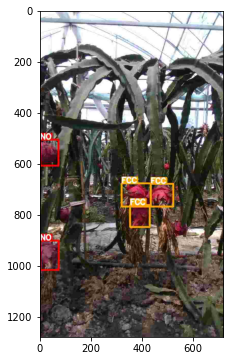

In [6]:
# 显示图像 确定裁剪距离 
NUMIMAGE_SEQ = 5
NUM_IMAGE = [80,498,658, 715,833,223][NUMIMAGE_SEQ] 
IMAGES_PATH = os.path.join('runs\detect202301', str(NUM_IMAGE).zfill(4))# 图片集地址
imgnum_ori_get = glob.glob(os.path.join(IMAGES_PATH, '*\Ori*.jpg')) \
                + glob.glob(os.path.join(IMAGES_PATH, 'Ori*.jpg'))

image = cv2.imread( imgnum_ori_get[0] ) 

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     
plt.rcParams[ 'figure.figsize' ] = [16, 6]                           
plt.imshow(image) 

In [16]:
# 裁剪图像
NUMIMAGE_SEQ =5
NUM_IMAGE = [80,498,658, 715,833,223][NUMIMAGE_SEQ]

#裁剪起始点
VALUE_CROP_START = [ [], [], [], [], [], [0,500], ][NUMIMAGE_SEQ]
VALUE_CROP_ADD = [ [], [], [], [], [], [590,510], ][NUMIMAGE_SEQ]

IMAGES_PATH = os.path.join('runs\detect202301', str(NUM_IMAGE).zfill(4))# 图片集地址
imgnum_ori_get = glob.glob(os.path.join(IMAGES_PATH, '*\Ori*.jpg')) \
                + glob.glob(os.path.join(IMAGES_PATH, 'Ori*.jpg'))
print('imgnum_ori_get ',imgnum_ori_get)
# imgnum_ori_get.append(glob.glob(os.path.join(IMAGES_PATH, 'Ori*.jpg')))

IMAGES_PATH_CROP_SAVE = os.path.join('runs\detect202301', str(NUM_IMAGE).zfill(4),str(NUM_IMAGE).zfill(4)+'CROP')

if not os.path.isdir(IMAGES_PATH_CROP_SAVE):
       os.makedirs(IMAGES_PATH_CROP_SAVE)

for file_a in imgnum_ori_get:
    img_1 = Image.open(file_a)
    print('file_a ',os.path.basename(file_a) )
    # 设置裁剪的位置 
    a,b = VALUE_CROP_START[0], VALUE_CROP_START[1] 
    crop_box = (a, b, a+VALUE_CROP_ADD[0], b+VALUE_CROP_ADD[1]) 
    # 裁剪图片
    img_2 = img_1.crop(crop_box) 
    #保存图片
    img_2.save(os.path.join(IMAGES_PATH_CROP_SAVE,'crop_'+ os.path.basename(file_a))) 

imgnum_ori_get  ['runs\\detect202301\\0223\\yolov3-spp_Gpool-A3_CSP_Ori_trian24_T(11)_8\\OriRGB_pitaya_000223_yolov3-spp_Gpool-A3_CSP_Ori_trian24_T(11)_8.jpg', 'runs\\detect202301\\0223\\yolov3_A3_CSP_Ori_trian24_T(11)_5\\OriRGB_pitaya_000223_yolov3_A3_CSP_Ori_trian24_T(11)_5.jpg', 'runs\\detect202301\\0223\\yolov3_A3_CSP_SPPG_Bi_trian24_T(11)_9\\OriRGB_pitaya_000223_yolov3_A3_CSP_SPPG_Bi_trian24_T(11)_9.jpg', 'runs\\detect202301\\0223\\yolov3_C3_Ori_trian24_T(11)_4\\OriRGB_pitaya_000223_yolov3_C3_Ori_trian24_T(11)_4.jpg', 'runs\\detect202301\\0223\\yolov3_CSP_Ori_trian24_T(11)_3\\OriRGB_pitaya_000223_yolov3_CSP_Ori_trian24_T(11)_3.jpg', 'runs\\detect202301\\0223\\yolov3_SPP_Gpool_trian24_T(11)_7\\OriRGB_pitaya_000223_yolov3_SPP_Gpool_trian24_T(11)_7.jpg', 'runs\\detect202301\\0223\\yolov3_SPP_trian24_T(11)_6\\OriRGB_pitaya_000223_yolov3_SPP_trian24_T(11)_6.jpg', 'runs\\detect202301\\0223\\yolov3_trian24_T_2\\OriRGB_pitaya_000223_yolov3_trian24_T_2.jpg', 'runs\\detect202301\\0223\\OriR

In [28]:
# 原图 排列显示
import PIL.Image as Image
from PIL import ImageDraw, ImageFont

import os
NUMIMAGE_SEQ = 5
NUM_IMAGE = [80,498,658, 715,833,223][NUMIMAGE_SEQ]

NUM_SEQ = 0
# IMAGES_PATH = ['img_crop', 'ImgOri_1057_crop','ImgOri_884_crop','ImgOri_153_crop' ][NUM_IMG]  # 图片集地址
IMAGES_PATH = os.path.join('runs\detect202301', str(NUM_IMAGE).zfill(4))# 图片集地址
IMAGES_FORMAT = ['.jpg', '.JPG','.png']  # 图片格式
IMAGE_SIZE_W = [720, ][NUM_SEQ] # 每张小图片的大小
IMAGE_SIZE_H = [1280, ][NUM_SEQ]# 每张小图片的大小

IMAGE_ROW = 2  # 图片间隔，也就是合并成一张图后，一共有几行
IMAGE_COLUMN = 5  # 图片间隔，也就是合并成一张图后，一共有几列

IMAGE_SAVE_PATH = os.path.join( 'runs\detect202301', str(NUM_IMAGE).zfill(4)+'_compare.jpg')# 图片转换后的地址

# 获取图片集地址下的所有图片名称
image_names = glob.glob(os.path.join(IMAGES_PATH, '*\Ori*.jpg')) \
                +glob.glob(os.path.join(IMAGES_PATH, 'Ori*.jpg'))


#排序，这里需要根据自己的图片名称切割，得到数字
image_names.sort(key=lambda x:int(x.split('.')[0][-1]))
print('image_names[0]',image_names[0])

# 简单的对于参数的设定和实际图片集的大小进行数量判断
if len(image_names) != IMAGE_ROW * IMAGE_COLUMN:
    raise ValueError("合成图片的参数和要求的数量不能匹配！")

padding_W = 10
padding_H = 80
head_padding=80
# 定义图像拼接函数
def image_compose():
    to_image = Image.new('RGB',(IMAGE_COLUMN * IMAGE_SIZE_W+padding_W*(IMAGE_COLUMN-1), head_padding+IMAGE_ROW * IMAGE_SIZE_H+padding_H*(IMAGE_ROW-1)),'white' )  # 创建一个新图
    # 循环遍历，把每张图片按顺序粘贴到对应位置上
    for y in range(1, IMAGE_ROW + 1):
        for x in range(1, IMAGE_COLUMN + 1):
            from_image = Image.open(image_names[IMAGE_COLUMN * (y - 1) + x - 1]).resize(
                (IMAGE_SIZE_W, IMAGE_SIZE_H), Image.ANTIALIAS)
            to_image.paste(from_image, ((x - 1) * IMAGE_SIZE_W+padding_W* (x - 1), (y - 1) * IMAGE_SIZE_H+padding_H* (y - 1)))

    draw = ImageDraw.Draw(to_image)
    text = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)']

    font = ImageFont.truetype(r'C:\Windows\Fonts\times.ttf', 48)

    # for j in range(1, IMAGE_ROW + 1):
    #     for i in range(1, IMAGE_COLUMN + 1):
    #         draw.text(( (IMAGE_SIZE_W+padding_W)*(i-1+0.45), (IMAGE_SIZE_H + padding_H*0.10)*(j)), text[(i-1)+(j-1)*IMAGE_COLUMN], fill='#666', font=font)  #位置 水平 + 高度
    #         print(j, (IMAGE_SIZE_W+padding_W)*(i-1+0.45), (IMAGE_SIZE_H + padding_H*0.10)*(j), text[(i-1)+(j-1)*IMAGE_COLUMN])

    
    for i in range(1, IMAGE_COLUMN + 1):
        draw.text(( (IMAGE_SIZE_W+padding_W)*(i-1+0.45), (IMAGE_SIZE_H + padding_H*0.1)), text[(i-1)], fill='#333', font=font)  #位置 水平 + 高度
    
    draw = ImageDraw.Draw(to_image)

    text2 = ['(f)','(g)','(h)','(i)','(j)']
    for i in range(1, IMAGE_COLUMN + 1):
        draw.text(( (IMAGE_SIZE_W+padding_W)*(i-1+0.45), ((IMAGE_SIZE_H )*2+ padding_H*1.1)), text2[(i-1)], fill='#333', font=font)  #位置 水平 + 高度
     
    return to_image.save(IMAGE_SAVE_PATH)  # 保存新图

image_compose()  # 调用函数

image_names[0] runs\detect202301\0223\OriRGB_pitaya_000223_OriRec_0.jpg


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9968\1822003566.py:44: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  (IMAGE_SIZE_W, IMAGE_SIZE_H), Image.ANTIALIAS)


In [27]:
# 裁剪图 排列显示
import PIL.Image as Image
from PIL import ImageDraw, ImageFont

import os
NUMIMAGE_SEQ = 5
NUM_IMAGE = [80,498,658, 715,833,223][NUMIMAGE_SEQ]

NUM_SEQ = 5
# IMAGES_PATH = ['img_crop', 'ImgOri_1057_crop','ImgOri_884_crop','ImgOri_153_crop' ][NUM_IMG]  # 图片集地址
IMAGES_PATH = os.path.join('runs\detect202301', str(NUM_IMAGE).zfill(4))# 图片集地址
IMAGES_FORMAT = ['.jpg', '.JPG','.png']  # 图片格式

IMAGE_SIZE_W = [100, 100, 100, 100, 100, 590][NUM_SEQ] # 每张小图片的大小
IMAGE_SIZE_H = [100, 100, 100, 100, 100 ,510][NUM_SEQ]# 每张小图片的大小

IMAGE_ROW = 2  # 图片间隔，也就是合并成一张图后，一共有几行
IMAGE_COLUMN = 5  # 图片间隔，也就是合并成一张图后，一共有几列

IMAGE_SAVE_PATH = os.path.join( 'runs\detect202301', str(NUM_IMAGE).zfill(4)+'_compare_CROP.jpg')# 图片转换后的地址

# 获取图片集地址下的所有图片名称
image_names = glob.glob(os.path.join(IMAGES_PATH, '*\crop*.jpg'))

#排序，这里需要根据自己的图片名称切割，得到数字
image_names.sort(key=lambda x:int(x.split('.')[0][-1]))
print('image_names[0]',image_names[0])

# 简单的对于参数的设定和实际图片集的大小进行数量判断
if len(image_names) != IMAGE_ROW * IMAGE_COLUMN:
    raise ValueError("合成图片的参数和要求的数量不能匹配！")

padding_W = 10
padding_H = 80
head_padding=80
# 定义图像拼接函数
def image_compose():
    to_image = Image.new('RGB',(IMAGE_COLUMN * IMAGE_SIZE_W+padding_W*(IMAGE_COLUMN-1), head_padding+IMAGE_ROW * IMAGE_SIZE_H+padding_H*(IMAGE_ROW-1)),'white' )  # 创建一个新图
    # 循环遍历，把每张图片按顺序粘贴到对应位置上
    for y in range(1, IMAGE_ROW + 1):
        for x in range(1, IMAGE_COLUMN + 1):
            from_image = Image.open(image_names[IMAGE_COLUMN * (y - 1) + x - 1]).resize(
                (IMAGE_SIZE_W, IMAGE_SIZE_H), Image.ANTIALIAS)
            to_image.paste(from_image, ((x - 1) * IMAGE_SIZE_W+padding_W* (x - 1), (y - 1) * IMAGE_SIZE_H+padding_H* (y - 1)))

    draw = ImageDraw.Draw(to_image)
    text = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)']

    font = ImageFont.truetype(r'C:\Windows\Fonts\times.ttf', 48)

    # for j in range(1, IMAGE_ROW + 1):
    #     for i in range(1, IMAGE_COLUMN + 1):
    #         draw.text(( (IMAGE_SIZE_W+padding_W)*(i-1+0.45), (IMAGE_SIZE_H + padding_H*0.10)*(j)), text[(i-1)+(j-1)*IMAGE_COLUMN], fill='#666', font=font)  #位置 水平 + 高度
    #         print(j, (IMAGE_SIZE_W+padding_W)*(i-1+0.45), (IMAGE_SIZE_H + padding_H*0.10)*(j), text[(i-1)+(j-1)*IMAGE_COLUMN])

    
    for i in range(1, IMAGE_COLUMN + 1):
        draw.text(( (IMAGE_SIZE_W+padding_W)*(i-1+0.45), (IMAGE_SIZE_H + padding_H*0.1)), text[(i-1)], fill='#333', font=font)  #位置 水平 + 高度
    
    draw = ImageDraw.Draw(to_image)

    text2 = ['(f)','(g)','(h)','(i)','(j)']
    for i in range(1, IMAGE_COLUMN + 1):
        draw.text(( (IMAGE_SIZE_W+padding_W)*(i-1+0.45), ((IMAGE_SIZE_H )*2+ padding_H*1.1)), text2[(i-1)], fill='#333', font=font)  #位置 水平 + 高度
     
    return to_image.save(IMAGE_SAVE_PATH)  # 保存新图

image_compose()  # 调用函数


image_names[0] runs\detect202301\0223\0223CROP\crop_OriRGB_pitaya_000223_OriRec_0.jpg


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9968\3320332649.py:43: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  (IMAGE_SIZE_W, IMAGE_SIZE_H), Image.ANTIALIAS)
